In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
data=pd.read_csv("50_startups.csv")
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
data=data.rename({'R&D Spend':'ReDSpend','Marketing Spend':'MarketingSpend'},axis=1)
data

,ReDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ReDSpend        50 non-null     float64
 1   Administration  50 non-null     float64
 2   MarketingSpend  50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
data.describe()

,ReDSpend,Administration,MarketingSpend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
data.isna().sum()

ReDSpend          0
Administration    0
MarketingSpend    0
State             0
Profit            0
dtype: int64

In [7]:
data.corr()

,ReDSpend,Administration,MarketingSpend,Profit
ReDSpend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MarketingSpend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


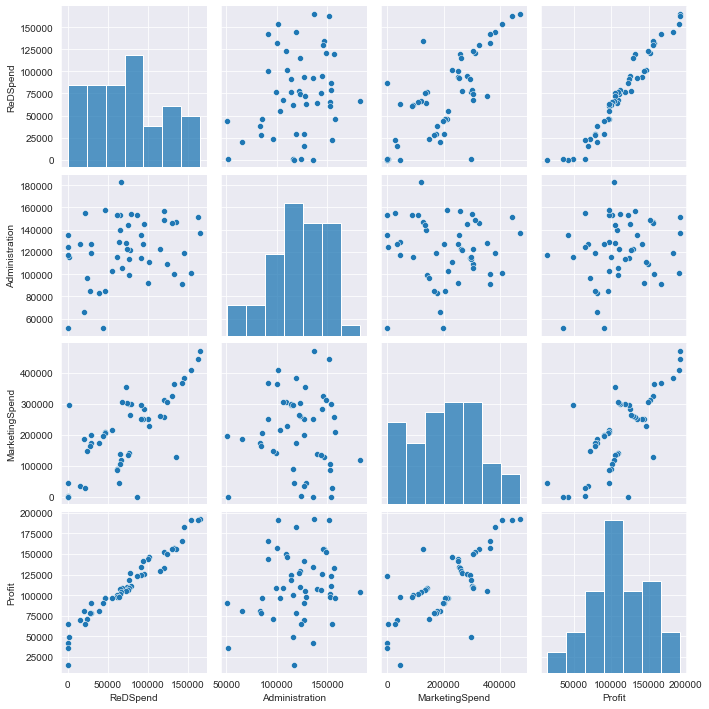

In [8]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [9]:
import statsmodels.formula.api as smf
model=smf.ols("Profit~Administration+MarketingSpend+ReDSpend",data = data).fit()

In [10]:
model.params

Intercept         50122.192990
Administration       -0.026816
MarketingSpend        0.027228
ReDSpend              0.805715
dtype: float64

In [11]:
print(model.tvalues, '\n', model.pvalues)

Intercept          7.626218
Administration    -0.525507
MarketingSpend     1.655077
ReDSpend          17.846374
dtype: float64 
 Intercept         1.057379e-09
Administration    6.017551e-01
MarketingSpend    1.047168e-01
ReDSpend          2.634968e-22
dtype: float64


In [12]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [13]:
#calculating Vif
rsq_Ads=smf.ols('Administration~MarketingSpend+ReDSpend',data=data).fit().rsquared
vif_Ads=1/(1-rsq_Ads)
print(vif_Ads)

1.1750910070550453


In [14]:
rsq_MS=smf.ols('MarketingSpend~Administration+ReDSpend',data=data).fit().rsquared
vif_MS=1/(1-rsq_MS)
print(vif_MS)

2.3267732905308773


In [15]:
rsq_RD=smf.ols('ReDSpend~MarketingSpend+Administration',data=data).fit().rsquared
vif_RD=1/(1-rsq_RD)
print(vif_RD)

2.4689030699947017


In [16]:
d1={'variables':['Ads','MS','RD'],'vif':[vif_Ads,vif_MS,vif_RD]}
vif_df=pd.DataFrame(d1)
vif_df

,variables,vif
0,Ads,1.175091
1,MS,2.326773
2,RD,2.468903


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


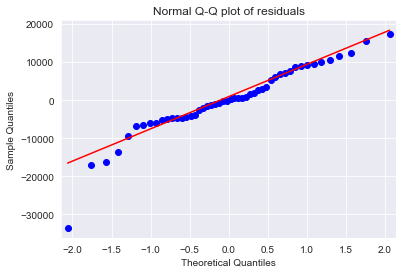

In [17]:
# Residual Analysis# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()


In [18]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

In [19]:
#Residual plot for homoscedasticity

In [20]:
def get_standard_values(vals):
    return (vals - vals.mean())/vals.std() 

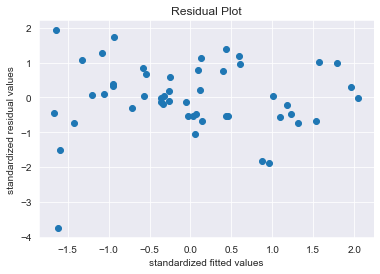

In [21]:
plt.scatter(get_standard_values(model.fittedvalues),get_standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

In [22]:
#residual vs regressor 

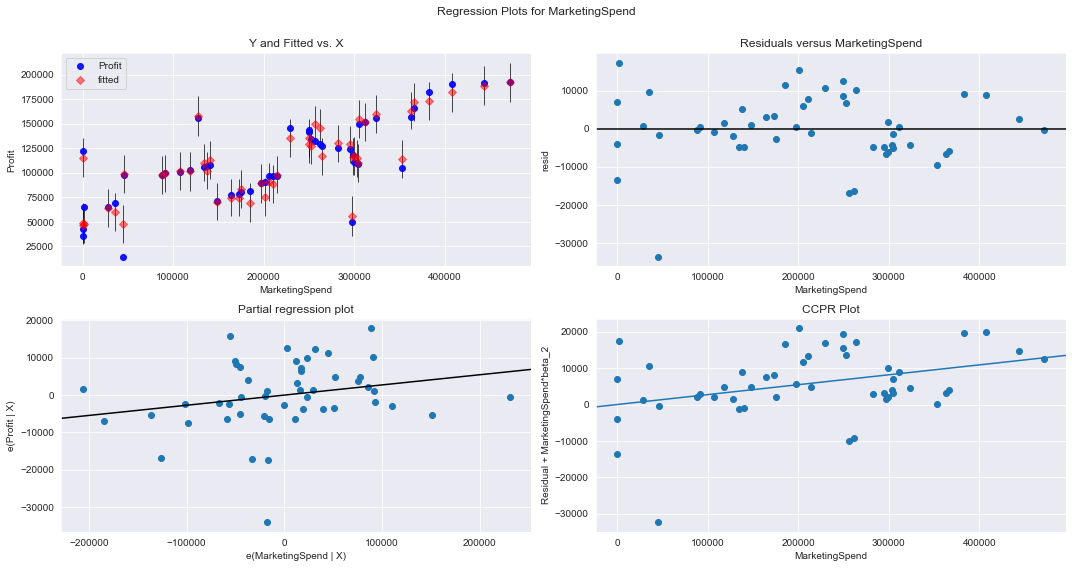

In [23]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MarketingSpend',fig=fig)
plt.show()

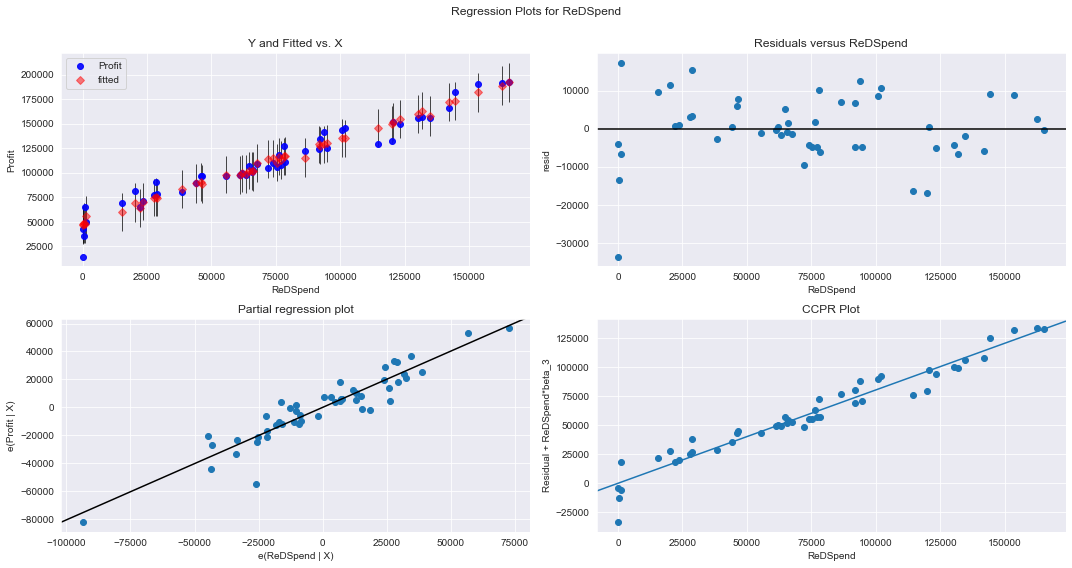

In [24]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'ReDSpend',fig=fig)
plt.show()

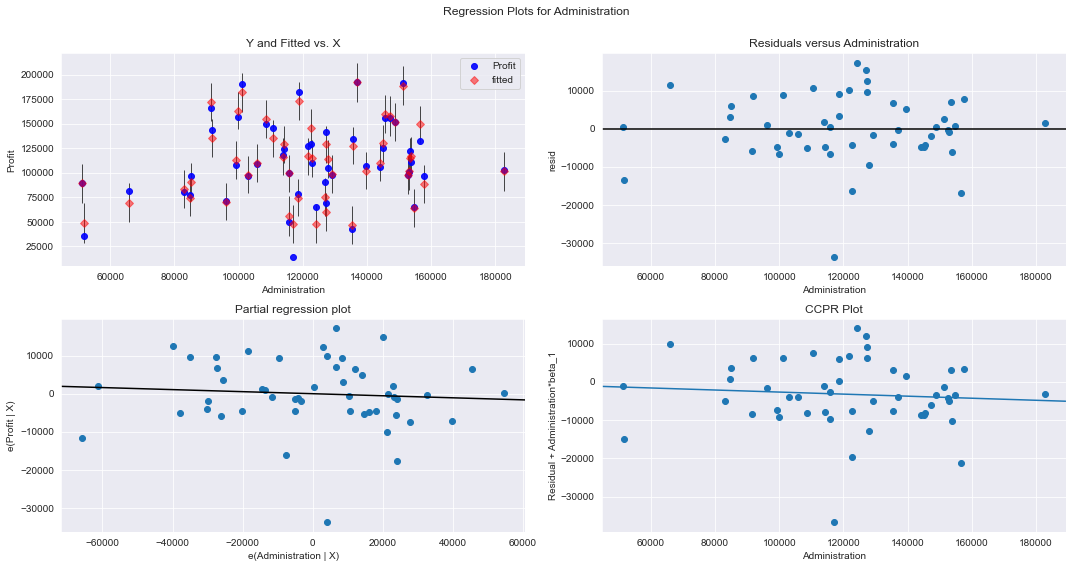

In [25]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Administration',fig=fig)
plt.show()

In [26]:
#model deletion diagnostics
#cook's distance

In [27]:
model_influence = model.get_influence()
(c,_)= model_influence.cooks_distance

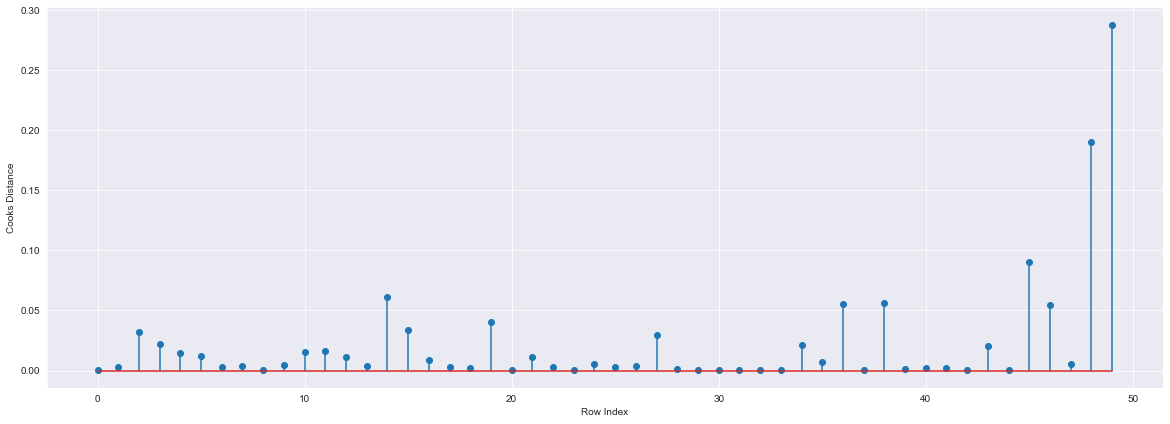

In [28]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [29]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)


(49, 0.2880822927543272)

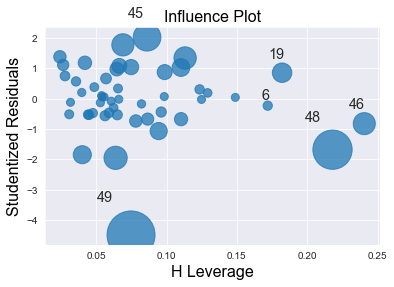

In [30]:
#Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are i
influence_plot(model)
plt.show()

In [31]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=data.shape[1]
n=data.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [32]:
data[data.index.isin([49])] 

,ReDSpend,Administration,MarketingSpend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [33]:
#Discard the data points which are influencers and reassign the row number (reset_index)
data1=data.drop(data.index[[49]],axis=0).reset_index(drop=True)
data1

,ReDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [34]:
#model deletion diagnostics and final model
Final_model=smf.ols("Profit~Administration+MarketingSpend+ReDSpend",data = data1).fit()

In [35]:
Final_model.rsquared

0.9613162435129847

In [36]:
data1

,ReDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [37]:
d2={'Prep_Models':['model','Final_model'],'Rsquared':[model.rsquared,Final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,model,0.950746
1,Final_model,0.961316


In [38]:
#new data for prediction
new_data=pd.DataFrame({'ReDSpend':40000,'Administration':30000,'MarketingSpend':200000},index=[1])
new_data

,ReDSpend,Administration,MarketingSpend
1,40000,30000,200000


In [39]:
Final_model.predict(new_data)

1    88083.198057
dtype: float64